**Company Bankruptcy Prediction data:** \
Notebook 2, Model development and Evaluation

In [19]:
!pip install tensorflow-addons
!pip install -q -U keras-tuner
%matplotlib inline

In [20]:
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_addons as tfa
import random as rn
import kerastuner as kt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.naive_bayes import GaussianNB

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#os.chdir("./drive/MyDrive/Colab Notebooks")
os.chdir("./drive/MyDrive/Colab_Notebooks/MLDM_project/")
#print(os.listdir("input_data/"))

In [23]:
#Loading data
train_data = np.load('input_data/bankruptcy_train.npy')
train_imbalanced_data = np.load('input_data/bankruptcy_train_imbalanced.npy')
test_data = np.load('input_data/bankruptcy_test.npy')

#Further splitting train_data into training and validation set
train_train_data = np.load('input_data/bankruptcy_train_train.npy')
train_val_data = np.load('input_data/bankruptcy_train_val.npy')

In [24]:
X_train = train_data[:,:-1]
y_train = np.reshape(train_data[:,-1], (10558,1))
X_train_imbalanced = train_imbalanced_data[:,:-1]
y_train_imbalanced = np.reshape(train_imbalanced_data[:,-1], (5455,1))
X_test = test_data[:,:-1]
y_test = test_data[:,-1]

X_train_train = train_train_data[:,:-1]
y_train_train = np.reshape(train_train_data[:,-1], (8446,1))
X_train_val = train_val_data[:,:-1]
y_train_val = np.reshape(train_val_data[:,-1], (1091,1))


### Model: SVM

Building the base model to evaluate the performance of svm on the dataset









In [ ]:
svmclassifier = svm.SVC()

In [ ]:
svmclassifier.fit(X_train, y_train)
predicted = svmclassifier.predict(X_test)

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1320
         1.0       0.19      0.39      0.26        44

    accuracy                           0.93      1364
   macro avg       0.58      0.67      0.61      1364
weighted avg       0.95      0.93      0.94      1364


Confusion matrix:
[[1248   72]
 [  27   17]]


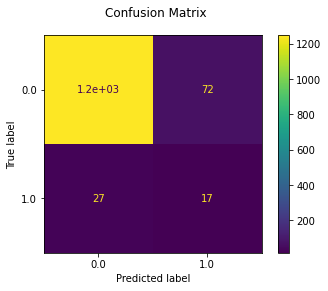

In [ ]:
#printing the classification report
print("Classification report with default parameters for classifier %s:\n%s\n"
      % (svmclassifier, metrics.classification_report(y_test, predicted)))

#plotting the confusion matrix
svm_matx = metrics.plot_confusion_matrix(svmclassifier, X_test, y_test)
svm_matx.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % svm_matx.confusion_matrix)
plt.show()


#### SVM: Hyperparamer tuning

In [ ]:
#defining the parameters for tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1,scoring = 'f1_macro')
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print('The best hyper-parameters for SVM: \n',grid.best_params_)

The best parameters for SVM after using Grid Search CV are 'kernel': 'rbf', 'gamma': 0.1, 'C': 1 by fitting 5 folds for each of 10 candidates, totalling 125 fits. 



Testing Accuracy = 0.967741935483871
ROC Area under Curve for SVM = 0.5109848484848485
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1320
         1.0       0.50      0.02      0.04        44

    accuracy                           0.97      1364
   macro avg       0.73      0.51      0.51      1364
weighted avg       0.95      0.97      0.95      1364

Confusion matrix:
[[1319    1]
 [  43    1]]


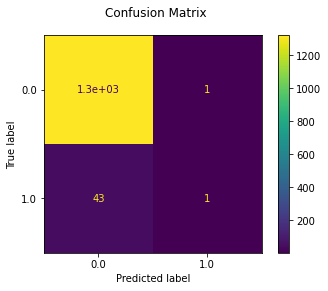

In [26]:
#fitting the model with the best hyperparameters
svm_tuned = svm.SVC(C= 1,gamma= 0.1,kernel= 'rbf', probability=True)
svm_tuned.fit(X_train,y_train)
svm_imbalanced_tuned = svm.SVC(C= 1,gamma= 0.1,kernel= 'rbf', probability=True)
svm_imbalanced_tuned.fit(X_train_imbalanced,y_train_imbalanced)

#model predictions
y_pred = svm_tuned.predict(X_test)

#Printing the accuracy score
acc_svm = accuracy_score(y_test, y_pred)
print("Testing Accuracy = {}".format(acc_svm))

#Printing the AUC for SVM
roc_auc_svm = metrics.roc_auc_score(y_test,y_pred)
print("ROC Area under Curve for SVM = {}".format(roc_auc_svm))

#printing classification report
SVMreport = metrics.classification_report(y_test,y_pred)
print('Classification Report: \n', SVMreport)

#printing the confusion matrix
disp = metrics.plot_confusion_matrix(svm_tuned, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

### Model: Decision Tree

In [ ]:
Dtree = DecisionTreeClassifier(random_state=20, ccp_alpha = 0.015)
Dtree = Dtree.fit(X_train,y_train)

In [ ]:
# Prediction on the test data
y_pred = Dtree.predict(X_test)

# Accuracy score of the test data

print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9222873900293255


Checking different metrics for decision tree model with default hyper parameters:

Training accuracy:  1.0
Testing Accuracy = 0.9222873900293255
ROC Area under Curve = 0.6193181818181819
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1320
         1.0       0.15      0.30      0.20        44

    accuracy                           0.92      1364
   macro avg       0.56      0.62      0.58      1364
weighted avg       0.95      0.92      0.93      1364

Confusion matrix:
[[1245   75]
 [  31   13]]


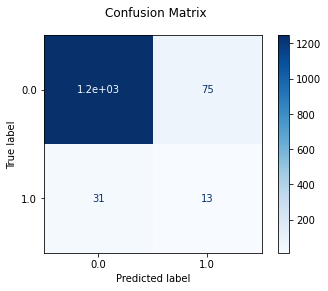

In [ ]:
# Checking different metrics for decision tree model with default hyper parameters

print('Checking different metrics for decision tree model with default hyper parameters:\n')

print("Training accuracy: ", Dtree.score(X_train,y_train))

acc = accuracy_score(y_test, y_pred)
print("Testing Accuracy = {}".format(acc))

roc_auc = roc_auc_score(y_test, Dtree.predict_proba(X_test)[:, 1])
print("ROC Area under Curve = {}".format(roc_auc))

class_report = classification_report(y_test,y_pred)
print('Classification Report: \n', class_report)

cm_plt = metrics.plot_confusion_matrix(Dtree, X_test, y_test, cmap=plt.cm.Blues)
cm_plt.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % cm_plt.confusion_matrix)
plt.show()

#### Decision Tree: Hyper parameter Tuning - Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set values for each parameters

max_depth = [5, 10, 15, 25, 30, 35, 40, 45, 50]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15, 20, 25, 30]
max_features = [1, 2, 5, 10, 15, 20, 25, 30]
max_leaf_nodes = [2, 5, 10, 15, 20]

# Creating a dictionary for the hyper parameters

param_grid = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features = max_features, max_leaf_nodes = max_leaf_nodes)

# Applying GridSearchCV to get the best value for hyperparameters

grid_search = GridSearchCV(Dtree, param_grid, cv = 5, verbose = 1, n_jobs = -1)
best_grid = grid_search.fit(X_train, y_train)

# Printing the best hyper parameters

print('The best hyper parameters are: \n', grid_search.best_params_)

**Best Grid search hyper parameters are:**

Fitting 5 folds for each of 14400 candidates, totalling 72000 fits

The best hyper parameters are: 

 {'max_depth': 25, 'max_features': 30, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 15}

In [25]:
# Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV

Dtree_grid_tuned = DecisionTreeClassifier(random_state=20, ccp_alpha = 0.015, criterion = 'entropy', splitter = 'random', max_depth = 25, min_samples_leaf = 5, min_samples_split = 15, max_features = 30, max_leaf_nodes = 20)
Dtree_grid_tuned.fit(X_train,y_train)
Dtree_imbalanced_grid_tuned = DecisionTreeClassifier(random_state=20, ccp_alpha = 0.015, criterion = 'entropy', splitter = 'random', max_depth = 25, min_samples_leaf = 5, min_samples_split = 15, max_features = 30, max_leaf_nodes = 20)
Dtree_imbalanced_grid_tuned.fit(X_train_imbalanced,y_train_imbalanced)

y_pred1 = Dtree_grid_tuned.predict(X_test)

Checking different metrics for decision tree model after tuning the hyper parameters:

Training accuracy:  0.7437014586095851
Testing Accuracy = 0.8812316715542522
ROC Area under Curve = 0.7079545454545454
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.89      0.94      1320
         1.0       0.14      0.52      0.22        44

    accuracy                           0.88      1364
   macro avg       0.56      0.71      0.58      1364
weighted avg       0.96      0.88      0.91      1364

Confusion matrix:
[[1179  141]
 [  21   23]]


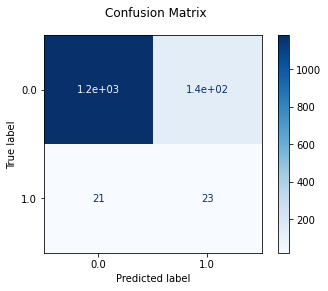

In [ ]:
# Checking different metrics for decision tree model with hyper parameters

print('Checking different metrics for decision tree model after tuning the hyper parameters:\n')

print("Training accuracy: ", Dtree_grid_tuned.score(X_train,y_train))

acc = accuracy_score(y_test, y_pred1)
print("Testing Accuracy = {}".format(acc))

roc_auc = roc_auc_score(y_test, Dtree_grid_tuned.predict_proba(X_test)[:, 1])
print("ROC Area under Curve = {}".format(roc_auc))

class_report = classification_report(y_test,y_pred1)
print('Classification Report: \n', class_report)

cm_plt = metrics.plot_confusion_matrix(Dtree_grid_tuned, X_test, y_test, cmap=plt.cm.Blues)
cm_plt.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % cm_plt.confusion_matrix)
plt.show()

#### Decision Tree: Hyper parameter Tuning - Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Set values for each parameters

max_depth = [5, 10, 15, 25, 30, 35, 40, 45, 50]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15, 20, 25, 30]
max_features = [1, 2, 5, 10, 15, 20, 25, 30]
max_leaf_nodes = [2, 5, 10, 15, 20]

# Creating a dictionary for the hyper parameters

param_grid = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features = max_features, max_leaf_nodes = max_leaf_nodes)

# Applying RandomizedSearchCV to get the best value for hyperparameters

rand_search = RandomizedSearchCV(Dtree, param_grid, cv = 5, verbose = 1, n_jobs = -1)
best_grid = rand_search.fit(X_train, y_train)

# Printing the best hyper parameters

print('The best hyper parameters are: \n', rand_search.best_params_)

**Best Random search hyper parameters are:**

Fitting 5 folds for each of 10 candidates, totalling 50 fits

The best hyper parameters are: 

{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': 15, 'max_features': 30, 'max_depth': 40}

In [ ]:
# Fitting the decision tree model with the best hyper parameters obtained through RandomizedSearchCV

Dtree_rand_tuned = DecisionTreeClassifier(random_state = 20, ccp_alpha = 0.015, criterion = 'entropy', splitter = 'random', max_depth = 40, min_samples_leaf = 1, min_samples_split = 10, max_features = 30, max_leaf_nodes = 15)
Dtree_rand_tuned.fit(X_train,y_train)
y_pred2 = Dtree_rand_tuned.predict(X_test)

Checking different metrics for decision tree model after tuning with the RandomizedSearchCV hyper parameters:

Training accuracy:  0.7366925554082212
Accuracy = 0.9032258064516129
ROC Area under Curve = 0.6973484848484849
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1320
         1.0       0.16      0.48      0.24        44

    accuracy                           0.90      1364
   macro avg       0.57      0.70      0.59      1364
weighted avg       0.95      0.90      0.93      1364

Confusion matrix:
[[1211  109]
 [  23   21]]


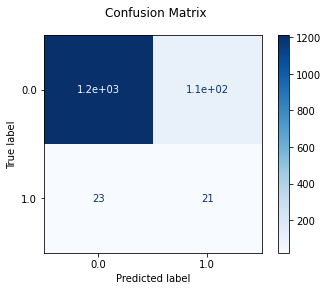

In [ ]:
# Checking different metrics for decision tree model with RandomizedSearchCV hyper parameters

print('Checking different metrics for decision tree model after tuning with the RandomizedSearchCV hyper parameters:\n')

print("Training accuracy: ", Dtree_rand_tuned.score(X_train,y_train))

acc = accuracy_score(y_test, y_pred2)
print("Accuracy = {}".format(acc))

roc_auc = roc_auc_score(y_test, Dtree_rand_tuned.predict_proba(X_test)[:, 1])
print("ROC Area under Curve = {}".format(roc_auc))

class_report = classification_report(y_test, y_pred2)
print('Classification Report: \n', class_report)

cm_plt = metrics.plot_confusion_matrix(Dtree_rand_tuned, X_test, y_test, cmap=plt.cm.Blues)
cm_plt.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % cm_plt.confusion_matrix)
plt.show()

ROC AUC curve before and after tuning hyper parameters:



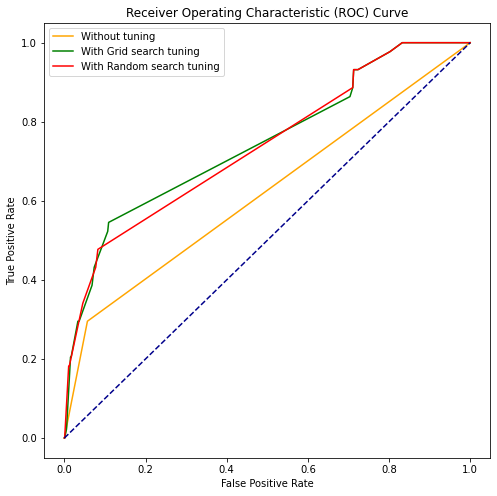

In [ ]:
from matplotlib import pyplot as plt

# Plotting the ROC AUC curve before and after tuning hyper parameters

print('ROC AUC curve before and after tuning hyper parameters:\n')

probs = Dtree.predict_proba(X_test)[:, 1]
probs_grid = Dtree_grid_tuned.predict_proba(X_test)[:, 1]
probs_rand = Dtree_rand_tuned.predict_proba(X_test)[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs) 
fper1, tper1, thresholds1 = roc_curve(y_test, probs_grid) 
fper2, tper2, thresholds2 = roc_curve(y_test, probs_rand) 

plt.figure(figsize=(8, 8))
plt.plot(fper, tper, color='orange', label='Without tuning')
plt.plot(fper1, tper1, color='green', label='With Grid search tuning')
plt.plot(fper2, tper2, color='red', label='With Random search tuning')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


###Model: DNN




#### DNN: Hyperparameter Tuning

Neurons in Hidden layer 1 : {20, 30, 40, 50} </br>
Neurons in Hidden layer 2 : {10, 20, 30, 40, 50} </br>
Dropout rate after Hidden layer 1 : {0.0, 0.1, 0.2, 0.3, 0.4, 0.5} </br>
Dropout rate after Hidden layer 2 : {0.0, 0.1, 0.2, 0.3, 0.4, 0.5} </br>
L1 regularizer : {1e-4, 1e-5, 1e-6, 1e-7, 1e-8} </br>
L2 regularizer : {1e-4, 1e-5, 1e-6, 1e-7, 1e-8} </br>
Optimizer: {'Adam', 'Nadam', 'Adamax', 'Adagrad'}

##### Hyperband

In [45]:
def create_model(hp):
  hp_dropout_rates_1 = hp.Choice('Dropout_rate_1', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  hp_dropout_rates_2 = hp.Choice('Dropout_rate_2', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  hp_l1_reg = hp.Choice('L1_penalty', values=[1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
  hp_l2_reg = hp.Choice('L2_penalty', values=[1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
  hp_hidden_neurons_1 = hp.Choice('hidden_neurons_1', values=[20, 30, 40, 50])
  hp_hidden_neurons_2 = hp.Choice('hidden_neurons_2', values=[10, 20, 30, 40, 50])

  model = keras.Sequential([
      keras.layers.Dense(53, activation='relu', input_dim=53),
      keras.layers.Dense(hp_hidden_neurons_1, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=hp_l1_reg, l2=hp_l2_reg)),
      keras.layers.Dropout(rate=hp_dropout_rates_1),
      keras.layers.Dense(hp_hidden_neurons_2, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=hp_l1_reg, l2=hp_l2_reg)),
      keras.layers.Dropout(rate=hp_dropout_rates_2),
      keras.layers.Dense(1)
  ])

  hp_optimizer = hp.Choice('Optimizer', values=['Adam', 'Nadam', 'Adamax', 'Adagrad'])

  model.compile(optimizer=hp_optimizer,
                loss=keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[tfa.metrics.F1Score(num_classes=1, average='macro', name='macro_f1'),
                         keras.metrics.BinaryAccuracy()])
  
  return model

In [ ]:
hypeband_tuner = kt.Hyperband(create_model,
                              objective=kt.Objective("val_macro_f1", direction="max"),
                              max_epochs=100,
                              factor=2)
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_macro_f1", patience=3)

In [ ]:
hypeband_tuner.search(x=X_train_train, 
                      y=y_train_train, 
                      validation_data=(X_train_val, y_train_val), 
                      callbacks=[stop_early])

In [ ]:
# Get the optimal hyperparameters
best_hps=hypeband_tuner.get_best_hyperparameters(num_trials=1)[0]
for key in best_hps.values:
  print('best', key, ': ', best_hps.values[key])

best Dropout_rate_1 :  0.5
best Dropout_rate_2 :  0.0
best L1_penalty :  1e-08
best L2_penalty :  1e-06
best hidden_neurons_1 :  40
best hidden_neurons_2 :  20
best Optimizer :  Adamax
best tuner/epochs :  2
best tuner/initial_epoch :  0
best tuner/bracket :  6
best tuner/round :  0


#### DNN: Models for different experiments

In [29]:
def create_model():
  # Define the structure of the model
  model = keras.Sequential([
      # FC layers
      keras.layers.Dense(53, activation='relu', input_dim=53),
      keras.layers.Dense(40, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-8, l2=1e-6)),
      keras.layers.Dropout(rate=0.5),
      keras.layers.Dense(20, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-8, l2=1e-6)),
      keras.layers.Dropout(rate=0.0),

      # Output layer
      keras.layers.Dense(1, activation='sigmoid')
  ], name = "DNN_model")

  # Assigning optimizer, loss function and evaluation metrices
  model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.001),
                loss=keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[tf.metrics.BinaryAccuracy(),
                         tfa.metrics.F1Score(num_classes=1, average='macro', name='macro_f1')])
  
  return model

##### Train with SMOTE data (Tuned with hyperband)

In [30]:
tf.random.set_seed(3)
rn.seed(3)
dnn = create_model()
dnn.summary()

Model: "DNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 53)                2862      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                2160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 5,863
Trainable params: 5,863
Non-trainable params: 0
_______________________________________________________

In [31]:
# Parameters
epochs = 50

# Training the model
dnn.fit(X_train, 
        y_train, 
        epochs = epochs,
        verbose = 0,
        validation_data = (X_test, y_test))

In [97]:
y_pred_train = [[round(num) for num in row] for row in dnn.predict(X_train)]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[5244   35]
 [   0 5279]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      5279
         1.0       0.99      1.00      1.00      5279

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558



In [98]:
y_pred = [[round(num) for num in row] for row in dnn.predict(X_test)]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1292   28]
 [  32   12]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1320
         1.0       0.30      0.27      0.29        44

    accuracy                           0.96      1364
   macro avg       0.64      0.63      0.63      1364
weighted avg       0.95      0.96      0.95      1364



##### Train with imbalanced data (Tuned with hyperband)

In [32]:
tf.random.set_seed(3)
rn.seed(3)
dnn_imbalanced = create_model()
dnn_imbalanced.summary()

Model: "DNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 53)                2862      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                2160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 5,863
Trainable params: 5,863
Non-trainable params: 0
_______________________________________________________

In [33]:
# Parameters
epochs = 50

# Training the model
dnn_imbalanced.fit(X_train_imbalanced, 
                  y_train_imbalanced, 
                  epochs = epochs,
                  verbose = 0,
                  validation_data = (X_test, y_test))

In [101]:
y_pred_train = [[round(num) for num in row] for row in dnn_imbalanced.predict(X_train_imbalanced)]
print(confusion_matrix(y_train_imbalanced, y_pred_train))
print(classification_report(y_train_imbalanced, y_pred_train))

[[5259   20]
 [ 113   63]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5279
         1.0       0.76      0.36      0.49       176

    accuracy                           0.98      5455
   macro avg       0.87      0.68      0.74      5455
weighted avg       0.97      0.98      0.97      5455



In [102]:
y_pred = [[round(num) for num in row] for row in dnn_imbalanced.predict(X_test)]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1311    9]
 [  39    5]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1320
         1.0       0.36      0.11      0.17        44

    accuracy                           0.96      1364
   macro avg       0.66      0.55      0.58      1364
weighted avg       0.95      0.96      0.96      1364



### Experiment 1: Comparison of balance and imbalanced data

#### Functions for comparison

In [36]:
def plot_confusion_matrix(model_list,model_names):
    for i in range(len(model_list)):
        if model_names[i][:3] == "DNN":
            y_pred = [[round(num) for num in row] for row in model_list[i].predict(X_test)]
        else:
            y_pred = model_list[i].predict(X_test).ravel()

        cm = confusion_matrix(y_test, y_pred)
        grp_names = ['TN','FP','FN','TP']
        grp_cnts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        grp_percent = ["{0:.2%}".format(value) for value 
                         in cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(grp_names,grp_cnts,grp_percent)]
        labels = np.asarray(labels).reshape(2,2)
        sns.set(font_scale=1.5)
        heatmap = sns.heatmap(cm, fmt='', cmap=plt.cm.Blues, annot=labels)
        heatmap.set_ylim([0,2])
        heatmap.set_title("Confusion Matrix of\n"+ model_names[i])
        plt.show()

In [37]:
def eval_metrics_table(model_list,model_names):
    Models_cols = []
    Models_compare = pd.DataFrame(columns = Models_cols)
    row_index = 0
    for i in range(len(models)):  
        if model_names[i][:3] == "DNN":
            y_pred = [[round(num) for num in row] for row in model_list[i].predict(X_test)]
            y_pred_prob = model_list[i].predict(X_test).ravel()
        else:
            y_pred = model_list[i].predict(X_test).ravel()
            y_pred_prob = model_list[i].predict_proba(X_test)[:,1]
    
        fpr, tpr, thresh = roc_curve(y_test, y_pred)
        Models_name = model_names[i]
        Models_compare.loc[row_index,'Model used'] = Models_name
        Models_compare.loc[row_index, 'Test Accuracy'] = accuracy_score(y_test, y_pred)
        Models_compare.loc[row_index, 'F1 score'] = f1_score(y_test, y_pred, average='macro')
        Models_compare.loc[row_index, 'Precision'] = precision_score(y_test, y_pred)
        Models_compare.loc[row_index, 'Recall'] = recall_score(y_test, y_pred)
        Models_compare.loc[row_index, 'ROC AUC'] = roc_auc_score(y_test, y_pred_prob)
        Models_compare.loc[row_index, 'Precision-recall AUC'] = average_precision_score(y_test, y_pred_prob)

        row_index+=1
    
    #Models_compare.sort_values(by = ['F1 score'], ascending = False, inplace = True)  
    Models_compare.reset_index(inplace = True, drop=True)  
    return Models_compare

In [38]:
def plot_multiple_roc_curve(model_list, model_names):
    mean_fpr = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot()

    #colors = plt.cm.rainbow(np.linspace(0,1,len(model_list)))
    for i in range(len(model_list)):
      if model_names[i][:3] == "DNN":
        y_pred = model_list[i].predict(X_test).ravel()
      else:
        y_pred = model_list[i].predict_proba(X_test)[:,1]

      fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
      roc_auc = metrics.auc(fpr, tpr)
      plt.plot(fpr, tpr, lw=2,
              label='Model - {0} (AUC = {1:0.4f})'.format(model_names[i], roc_auc)) 
    
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)  

    ax.legend(loc="lower right", prop={'size': 15})
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Receiver operating characteristic(ROC) curve', fontsize=18)
    plt.show()

In [39]:
def plot_multiple_pr_curve(model_list, model_names):
  precision = dict()
  recall = dict()
  average_precision = dict()
  for i in range(len(models)):
        if model_names[i][:3] == "DNN":
          y_pred = models[i].predict(X_test).ravel()
          precision[i], recall[i], _ = precision_recall_curve(y_test,
                                                              y_pred)
          precision[i][-2], recall[i][-2] = 1.0, 0.0
          average_precision[i] = average_precision_score(y_test, y_pred)
        else:
          y_pred = models[i].predict_proba(X_test)[:,1]
          precision[i], recall[i], _ = precision_recall_curve(y_test,
                                                              y_pred)
          precision[i][-2], recall[i][-2] = 1.0, 0.0
          average_precision[i] = average_precision_score(y_test, y_pred)

  plt.figure(figsize=(6, 6), dpi=100)
  f_scores = np.linspace(0.2, 0.8, num=4)
  lines = []
  labels = []
  for f_score in f_scores:
      x = np.linspace(0.01, 1)
      y = f_score * x / (2 * x - f_score)
      l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
      plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

  colors = plt.cm.rainbow(np.linspace(0,1,len(model_list)))
  for i, color, model_name in zip(range(len(model_list)), colors, model_names):
      l, = plt.plot(recall[i], precision[i], color=color, lw=1.5)
      lines.append(l)
      labels.append('Class - {0} (AUC = {1:0.4f})'.format(model_name, average_precision[i]))

  fig = plt.gcf()
  fig.subplots_adjust(bottom=0.25)
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall curve')
  plt.legend(lines, labels, loc=(0.1, 0.8), prop=dict(size=10))

  plt.show()

#### SVM

In [34]:
models = [svm_tuned, svm_imbalanced_tuned]
model_names = ["SVM with SMOTE", "SVM with imbalanced data"]

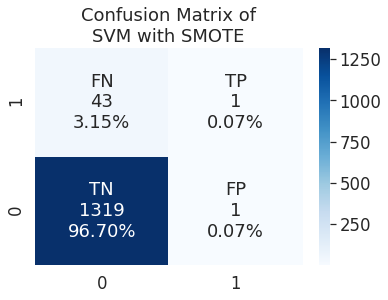

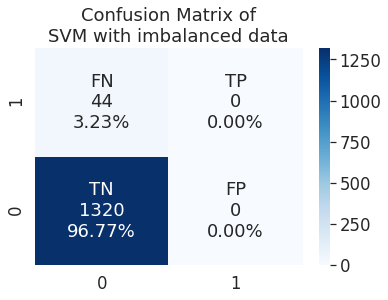

In [ ]:
plot_confusion_matrix(models,model_names)

In [ ]:
eval_metrics_table(models,model_names)

,Model used,Test Accuracy,F1 score,Precision,Recall
0,SVM with SMOTE,0.967742,0.513536,0.5,0.022727
1,SVM with imbalanced data,0.967742,0.491803,0.0,0.000000


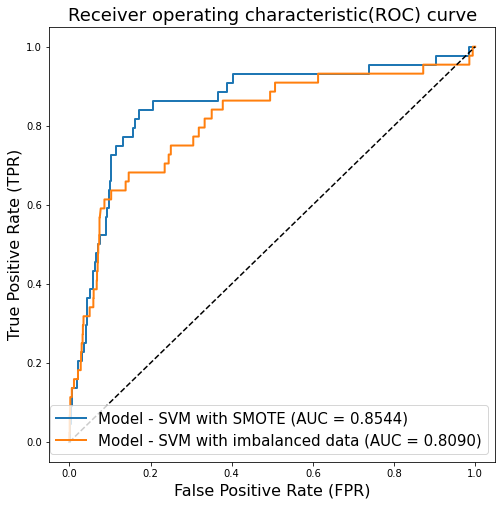

In [ ]:
plot_multiple_roc_curve(models, model_names)

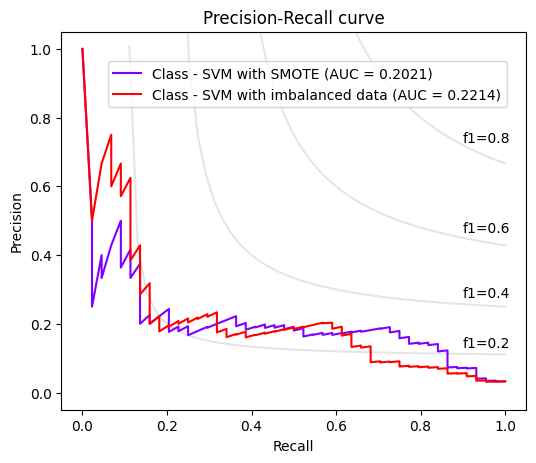

In [40]:
plot_multiple_pr_curve(models, model_names)

#### DT

In [41]:
models = [Dtree_grid_tuned, Dtree_imbalanced_grid_tuned]
model_names = ["DT with SMOTE", "DT with imbalanced data"]

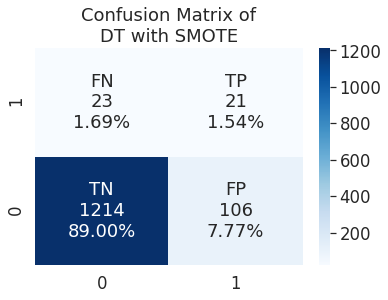

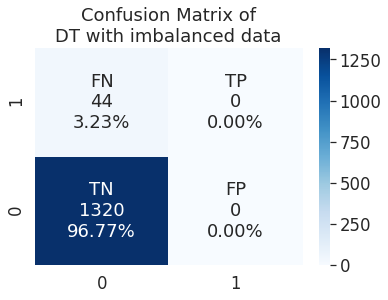

In [ ]:
plot_confusion_matrix(models,model_names)

In [ ]:
eval_metrics_table(models,model_names)

,Model used,Test Accuracy,F1 score,Precision,Recall
0,DT with SMOTE,0.905425,0.597582,0.165354,0.477273
1,DT with imbalanced data,0.967742,0.491803,0.000000,0.000000


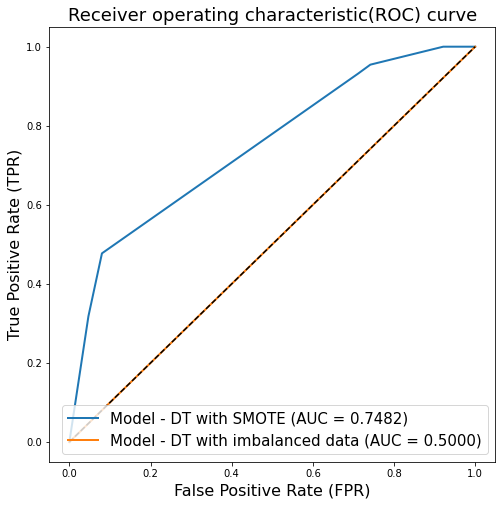

In [ ]:
plot_multiple_roc_curve(models, model_names)

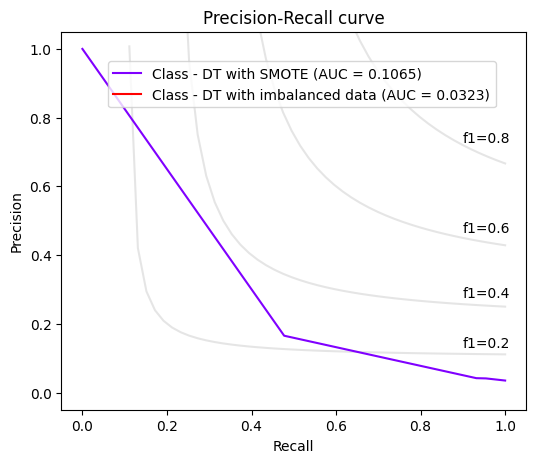

In [42]:
plot_multiple_pr_curve(models, model_names)

#### DNN

In [43]:
models = [dnn, dnn_imbalanced]
model_names = ["DNN with SMOTE", "DNN with imbalanced data"]

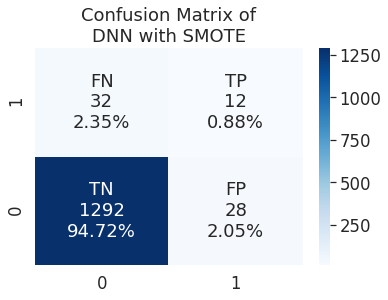

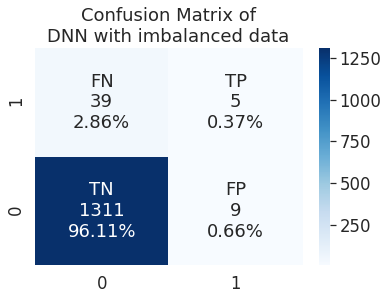

In [ ]:
plot_confusion_matrix(models,model_names)

In [ ]:
eval_metrics_table(models,model_names)

,Model used,Test Accuracy,F1 score,Precision,Recall
0,DNN with SMOTE,0.956012,0.631511,0.300000,0.272727
1,DNN with imbalanced data,0.964809,0.577218,0.357143,0.113636


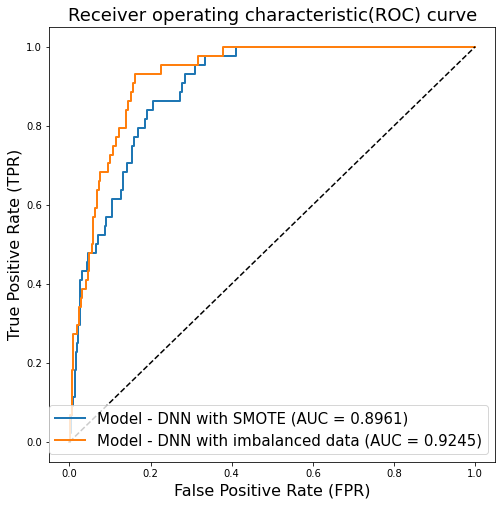

In [ ]:
plot_multiple_roc_curve(models, model_names)

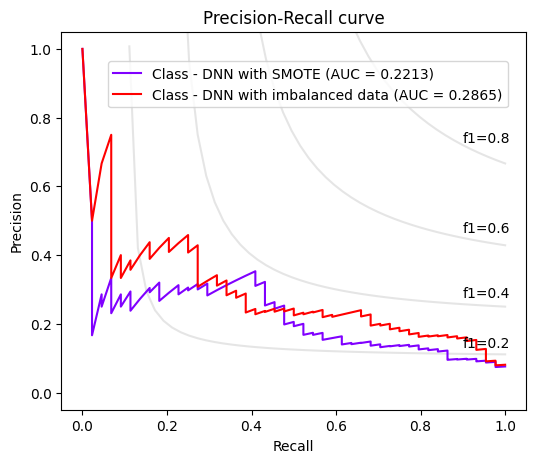

In [44]:
plot_multiple_pr_curve(models, model_names)

### Experiment 2: Comparison of 2 datasets in different size

In [15]:
nb = GaussianNB().fit(X_train, y_train)

In [17]:
models = [nb, svm_tuned, Dtree_grid_tuned, dnn]
model_names = ["Base model", "SVM", "DT", "DNN"]

In [18]:
eval_metrics_table(models,model_names)

,Model used,Test Accuracy,F1 score,Precision,Recall,ROC AUC,Precision-recall AUC
0,Base model,0.886364,0.601911,0.167665,0.636364,0.874587,0.209240
1,SVM,0.967742,0.513536,0.500000,0.022727,0.854442,0.202070
2,DT,0.905425,0.597582,0.165354,0.477273,0.748175,0.106458
3,DNN,0.956012,0.631511,0.300000,0.272727,0.896367,0.221297
